# Introduction – Physical System and Equations of Motion

The drag force equation is given as:
\begin{equation}
F_D = \frac{1}{2} C_D \rho A v^2
\end{equation}
where $C_D$ is the drag coefficient, $\rho$ is the air density, $A$ is the cross-sectional area, and $v$ is the velocity.

In three-dimensional projectile motion with air resistance proportional to velocity squared, the equations of motion must include both gravitational acceleration and a drag force acting opposite to the velocity vector. The governing equations for velocity components are:

\begin{align}
\frac{d v_x}{dt} &= -\frac{F_D}{m} v v_x, \\
\frac{d v_y}{dt} &= -g - \frac{F_D}{m} v v_y, \\
\frac{d v_z}{dt} &= -\frac{F_D}{m}v v_z.
\end{align}

where the speed is given by:

\begin{equation}
v = \sqrt{v_x^2 + v_y^2 + v_z^2}.
\end{equation}

The corresponding position equations, obtained by integrating the velocity components, are:

\begin{align}
\frac{d x}{dt} &= v_x, \\
\frac{d y}{dt} &= v_y, \\
\frac{d z}{dt} &= v_z.
\end{align}


# Class Explanation

My class definition represents a baseball in three-dimensional space. I adapted the Particle3D class from a two-dimensional class in a computational physics course assignment. I chose to use the leapfrog method, as it is the most effective method I have learned for simulating projectile motion with quadratic drag, outperforming both Euler and RK4 implementations.

The leapfrog function remains largely the same as in the Particle2D class, since both treat positions and velocities as vectors. The most significant change in the vector operations is in the @property methods, where I use VPython vectors instead of NumPy arrays to facilitate animation.

In the __init__ method, I define the ball’s radius, coefficient of restitution, and a boolean flag (has_hit_wall) to track whether the ball has collided with the wall. These attributes are used in the check_wall_collision function, where I compare the ball's position with the Green Monster’s boundaries to determine whether it bounces off the wall. This function is then called in the animation loop to simulate the ball rebounding off the wall.

Additionally, I include a hit_ground function to determine when to terminate the animation loop and a horizontal_distance function to calculate the ball's total horizontal displacement for labeling purposes in the animation.

# Numerical Methods

The leapfrog method for numerical integration is a second-order variation of the Verlet method. It is symplectic, meaning conserves energy well in Hamiltonian systems, and is commonly used for systems where acceleration depends on velocity. The method consists of three update steps.

1. **Velocity half-step update:**
   $$
   v_{n+\frac{1}{2}} = v_n + \frac{\Delta t}{2} a_n
   $$

2. **Position full-step update:**
   $$
   x_{n+1} = x_n + \Delta t \cdot v_{n+\frac{1}{2}}
   $$

3. **Velocity full-step update using new acceleration:**
   $$
   v_{n+1} = v_{n+\frac{1}{2}} + \frac{\Delta t}{2} a_{n+1}
   $$

# Comparison to Non-Symplectic Methods

To illustrate the advantage of using the leapfrog method, here is a comparison of the Leapfrog distance prediction to the Fourth Order Runge-Kutta method for a batted ball hit at 110 mph at a 30 degree launch angle.

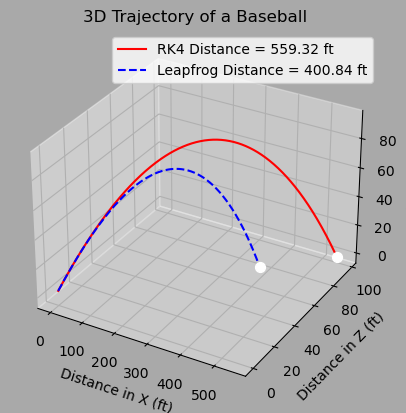

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Constants taken from Dr. Alan Nathan's Trajectory Calculator:
# https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fbaseball.physics.illinois.edu%2FTrajectoryCalculator.xlsx&wdOrigin=BROWSELINK)
g = 32.17                       # Gravity (ft/s^2)
rho = 0.0740                # Air density (lb/ft^3)
Cd = 0.33                       # Drag coefficient for a baseball
circumference = 9.125  / 12     # Circumference of a baseball (ft)
A = (circumference**2)/4/np.pi  # Cross-sectional area of a baseball (ft^2)
m = 0.32                   # Mass of baseball (lbs)
dt = 0.01                       # Time step (s)
Fd_coeff = 0.5 * rho * Cd * A   # Fd = Fd_coeff * v^2

# Initial conditions
exit_velo = 110                   # Initial velocity (mph)
launch_angle = 30                 # Launch angle (degrees)
spray_angle = 10                  # Spray angle (degrees)   
v0 = exit_velo * 5280 / 3600      # Convert to ft/s
vx0 = v0 * np.cos(np.radians(launch_angle)) * np.cos(np.radians(spray_angle))
vy0 = v0 * np.sin(np.radians(launch_angle))
vz0 = v0 * np.cos(np.radians(launch_angle)) * np.sin(np.radians(spray_angle))
x0, y0, z0 = 0, 3, 0                     # Initial position (middle-middle)
t0 = 0                            # Initial time

def RK4_3D(x0, y0, z0, vx0, vy0, vz0, t0, dt):
    
    # Confer initial conditions to correct format
    x_n = x0
    y_n = y0
    z_n = z0
    vx_n = vx0
    vy_n = vy0
    vz_n = vz0
    t_n = t0

    # Save values in arrays
    t = np.array([t_n])
    x = np.array([x_n])
    y = np.array([y_n])
    z = np.array([z_n])
    v = np.array([np.sqrt(vx_n**2 + vy_n**2 + vz_n**2)])

    def rk4_step():
        
        # Calculate k1 values
        k1x = vx_n
        k1y = vy_n
        k1z = vz_n
        v = np.sqrt(vx_n**2 + vy_n**2 + vz_n**2)
        k1vx = - Fd_coeff * v * vx_n
        k1vy = - Fd_coeff * v * vy_n - g
        k1vz = - Fd_coeff * v * vz_n

        # Calculate k2 values
        k2x = vx_n + 0.5 * dt * k1vx
        k2y = vy_n + 0.5 * dt * k1vy
        k2z = vz_n + 0.5 * dt * k1vz
        v = np.sqrt(k2x**2 + k2y**2 + k2z**2)
        k2vx = - Fd_coeff * v * k2x
        k2vy = - Fd_coeff * v * k2y - g
        k2vz = - Fd_coeff * v * k2z

        # Calculate k3 values
        k3x = vx_n + 0.5 * dt * k2vx
        k3y = vy_n + 0.5 * dt * k2vy
        k3z = vz_n + 0.5 * dt * k2vz
        v = np.sqrt(k3x**2 + k3y**2 + k3z**2)
        k3vx = - Fd_coeff * v * k3x
        k3vy = - Fd_coeff * v * k3y - g
        k3vz = - Fd_coeff * v * k3z

        # Calculate k4 values
        k4x = vx_n + dt * k3vx
        k4y = vy_n + dt * k3vy
        k4z = vz_n + dt * k3vz
        v = np.sqrt(k4x**2 + k4y**2 + k4z**2)
        k4vx = - Fd_coeff * v * k4x
        k4vy = - Fd_coeff * v * k4y - g
        k4vz = - Fd_coeff * v * k4z

        x_np1 = x_n + dt/6 * (k1x + 2*k2x + 2*k3x + k4x)
        y_np1 = y_n + dt/6 * (k1y + 2*k2y + 2*k3y + k4y)
        z_np1 = z_n + dt/6 * (k1z + 2*k2z + 2*k3z + k4z)
        vx_np1 = vx_n + dt/6 * (k1vx + 2*k2vx + 2*k3vx + k4vx)
        vy_np1 = vy_n + dt/6 * (k1vy + 2*k2vy + 2*k3vy + k4vy)
        vz_np1 = vz_n + dt/6 * (k1vz + 2*k2vz + 2*k3vz + k4vz)

        return x_np1, y_np1, z_np1, vx_np1, vy_np1, vz_np1

    while y_n > 0:
        # for each timestep:
        t_np1 = t_n + dt
        x_np1, y_np1, z_np1, vx_np1, vy_np1, vz_np1 = rk4_step()

        t = np.append(t, t_np1)
        x = np.append(x, x_np1)
        y = np.append(y, y_np1)
        z = np.append(z, z_np1)
        # Save velocity magnitude for energy plots
        v = np.append(v, np.linalg.norm([vx_np1, vy_np1, vz_np1]))

        # Update x_n for next timestep
        x_n = x_np1
        y_n = y_np1
        z_n = z_np1
        vx_n = vx_np1
        vy_n = vy_np1
        vz_n = vz_np1
        t_n = t_np1

    return t, x, y, z, v

t_r, x_r, y_r, z_r, v_r = RK4_3D(x0, y0, z0, vx0, vy0, vz0, t0, dt)

class Particle3D:
    def __init__(self, mass, x, y, z, vx, vy, vz):
        self.mass = mass
        self.position = np.array([x, y, z])
        self.velocity = np.array([vx, vy, vz])
        self.radius = circumference / 2 / np.pi
        self.has_hit_wall = False
        self.coefficient_of_restitution = 0.8

    def leapfrog(self, force_func, dt):
        """Performs a single step of the Leapfrog integration method."""
        acceleration = force_func(self.mass, self.velocity) / self.mass
        half_velocity = self.velocity + 0.5 * acceleration * dt
        self.position = self.position + half_velocity * dt
        new_acceleration = force_func(self.mass, half_velocity) / self.mass
        self.velocity = half_velocity + 0.5 * new_acceleration * dt

    def check_wall_collision(self):
        """Check if the ball has collided with the Green Monster wall and handle the collision."""
        # Calculate wall boundaries
        monster_x = 310
        monster_height = 37.166
        monster_z_min = -3
        monster_z_max = 218
        # Check if ball is approaching wall from the front
        approaching_wall = self.velocity.x > 0

        # Check for collision with wall
        if (not self.has_hit_wall and
            approaching_wall and
            monster_x - 3 < self.position.x <= monster_x + 3 and
            monster_z_min < self.position.z < monster_z_max and  # Within z bounds
            self.position.y < monster_height):  # Below top of wall
            print(self.position.x, self.position.z, self.position.y)
            # Reflect velocity with energy loss
            self.velocity.x = -self.velocity.x * self.coefficient_of_restitution
            # Indicate collision
            self.has_hit_wall = True
            return True
        return False

    @property
    def x(self):
        return self.position[0]

    @property
    def y(self):
        return self.position[1]
    
    @property
    def z(self):
        return self.position[2]

    @property
    def vx(self):
        return self.velocity[0]

    @property
    def vy(self):
        return self.velocity[1]
    
    @property
    def vz(self):
        return self.velocity[2]

    @property
    def horizontal_distance(self):
        return np.sqrt(self.x**2 + self.z**2)
    
    @property
    def hit_ground(self):
        return self.y <= 0 and self.vy < 0

def drag_p_grav_force(m, velocity):
    v = np.linalg.norm(velocity)  # Magnitude of velocity
    drag = -Fd_coeff * v * velocity  # Directional drag force
    gravity = np.array([0, -g * m, 0])  # Gravity force
    return drag + gravity  # Sum of forces

# Create and run simulation
particle = Particle3D(m, x0, y0, z0, vx0, vy0, vz0)
x_l, y_l, z_l, v_l = [particle.x], [particle.y], [particle.z], [particle.velocity]

while not particle.hit_ground:
    particle.leapfrog(drag_p_grav_force, dt)
    x_l.append(particle.x)
    y_l.append(particle.y)
    z_l.append(particle.z)
    v_l.append(particle.velocity)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot RK4 trajectory
ax.plot(x_r, z_r, y_r, color='red', label=f'RK4 Distance = {np.sqrt(x_r[-1]**2 + z_r[-1]**2):.2f} ft')

# Plot Leapfrog trajectory
ax.plot(x_l, z_l, y_l, color='blue', linestyle='dashed', label=f'Leapfrog Distance = {particle.horizontal_distance:.2f} ft')

# Set labels and title
ax.set_xlabel('Distance in X (ft)')
ax.set_ylabel('Distance in Z (ft)')
ax.set_zlabel('Height (ft)')
ax.set_title('3D Trajectory of a Baseball')

# Set background color to dark gray
ax.set_facecolor('darkgray')
fig.patch.set_facecolor('darkgray')

# Show the points at which the ball lands
ax.scatter(x_r[-1], z_r[-1], y_r[-1], color='white', s=50)
ax.scatter(x_l[-1], z_l[-1], y_l[-1], color='white', s=50)
# Add legend
ax.legend()
plt.show()

According to MLB Statcast data from 2024, balls hit with those conditions travelled at average distance of 427 feet. These hits were aided by backspin, as the Magnus force induced extra lift that carried the balls further than my model predicts.

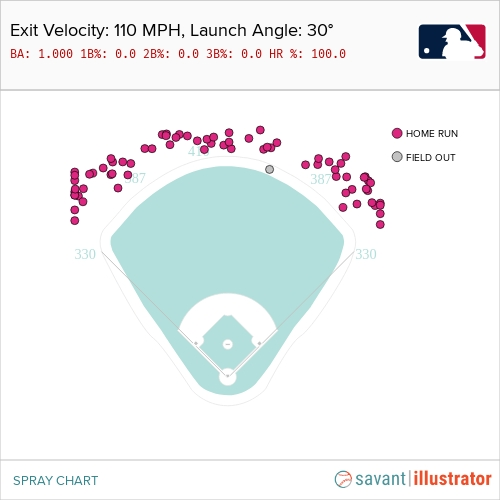

The Runge-Kutta method overshoots this distance dramatically, while the Leapfrog method provides what I find to be a fairly accurate prediction of distance travelled without backspin.

# Energy Stability Check

Both methods conserve energy almost perfectly without drag.

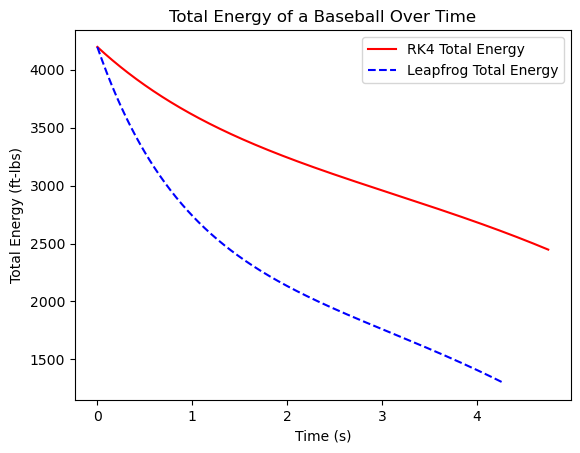

Conservation of Energy Analysis
RK4 Total Energy - Max: 4195.434311111112 Min: 4195.434311111101
Leapfrog Total Energy - Max: 4195.43431111112 Min: 4195.434311111108


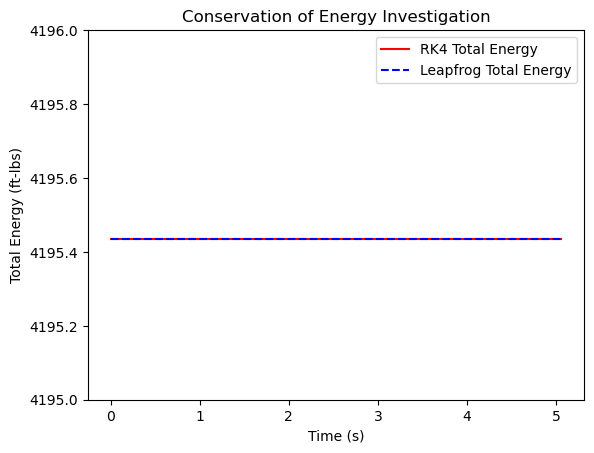

In [52]:
# Calculate the total energy of the baseball at each point in the trajectory
def potential_energy(y, m, g):
    return m * g * y

def kinetic_energy(v, m):
    return 0.5 * m * np.linalg.norm(v)**2

def total_energy(y, v, m, g):
    return potential_energy(y, m, g) + kinetic_energy(v, m)

## ----------- Total Energy Plots with Drag ----------- ##
#Calculate the total energy of the baseball for each method
total_energy_r = [total_energy(y_r[i], v_r[i], m, g) for i in range(len(y_r))]
total_energy_l = [total_energy(y_l[i], v_l[i], m, g) for i in range(len(y_l))]

# Plot the total energy of the baseball over time
plt.figure()
plt.plot(t_r, total_energy_r, color='red', label='RK4 Total Energy')
plt.plot(np.arange(0, len(y_l) * dt, dt), total_energy_l, color='blue', linestyle='dashed', label='Leapfrog Total Energy')
plt.xlabel('Time (s)')
plt.ylabel('Total Energy (ft-lbs)')
plt.title('Total Energy of a Baseball Over Time')
plt.legend()
plt.show()

## ------- Energy Conservation Analysis ------- ##
# Set drag to zero to show conservation of energy without drag
Fd_coeff = 0

# Run the RK4 simulation
t_r, x_r, y_r, z_r, v_r = RK4_3D(x0, y0, z0, vx0, vy0, vz0, t0, dt)

# Create and run Leapfrog simulation
particle = Particle3D(m, x0, y0, z0, vx0, vy0, vz0)
x_l, y_l, z_l, v_l = [particle.x], [particle.y], [particle.z], [particle.velocity]

while not particle.hit_ground:
    particle.leapfrog(drag_p_grav_force, dt)
    x_l.append(particle.x)
    y_l.append(particle.y)
    z_l.append(particle.z)
    v_l.append(particle.velocity)

#Calculate the total energy of the baseball for each method
total_energy_r = [total_energy(y_r[i], v_r[i], m, g) for i in range(len(y_r))]
total_energy_l = [total_energy(y_l[i], v_l[i], m, g) for i in range(len(y_l))]

print("Conservation of Energy Analysis")
print("RK4 Total Energy - Max:", max(total_energy_r), "Min:", min(total_energy_r))
print("Leapfrog Total Energy - Max:", max(total_energy_l), "Min:", min(total_energy_l))

# Plot the total energy of the baseball over time
plt.figure()
plt.plot(t_r, total_energy_r, color='red', label='RK4 Total Energy')
plt.plot(np.arange(0, len(y_l) * dt, dt), total_energy_l, color='blue', linestyle='dashed', label='Leapfrog Total Energy')
plt.xlabel('Time (s)')
plt.ylabel('Total Energy (ft-lbs)')
plt.title('Conservation of Energy Investigation')
plt.legend()
plt.ylim(4195, 4196)
plt.show()

# Animation

The animation in vpython traces the path of the ball from contact to the end of its trajector over or off of a dimensionally-accurate model of the Green Monster Fenway Park. Labels describing key details of the trajectory are included.

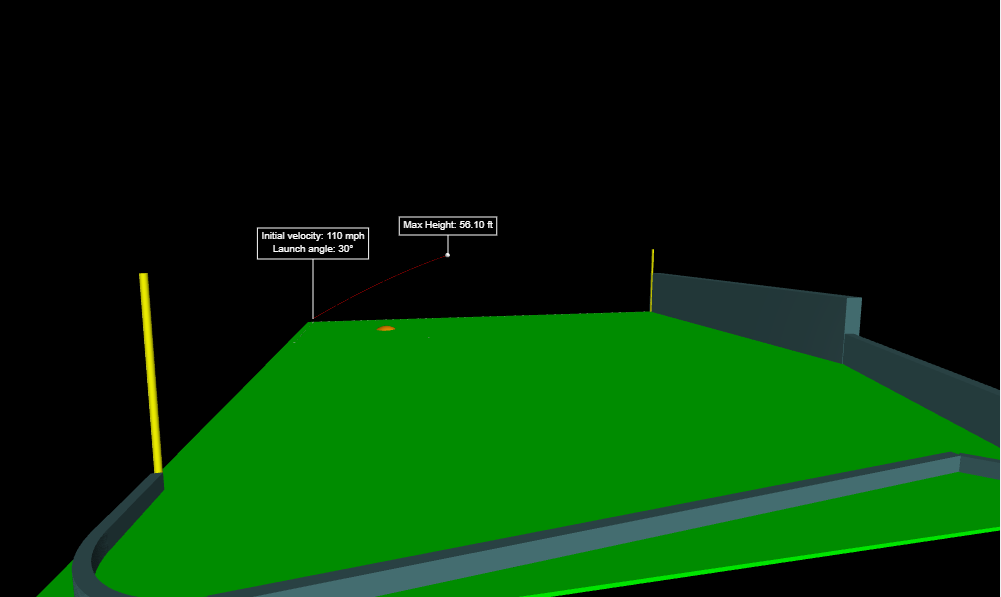

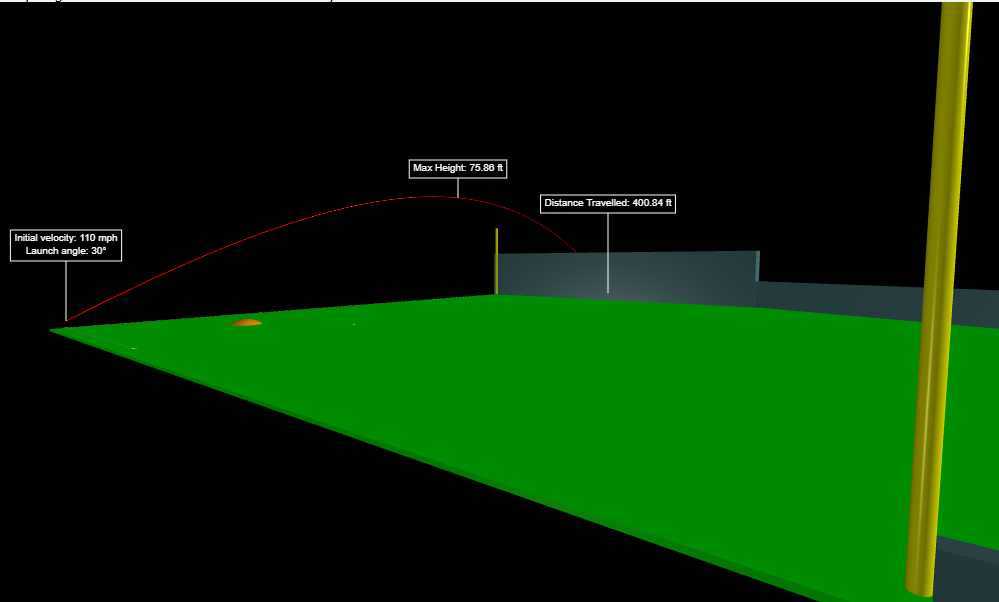

If the ball does not clear the Green Monster, the trajectory will include its rebound off the wall.

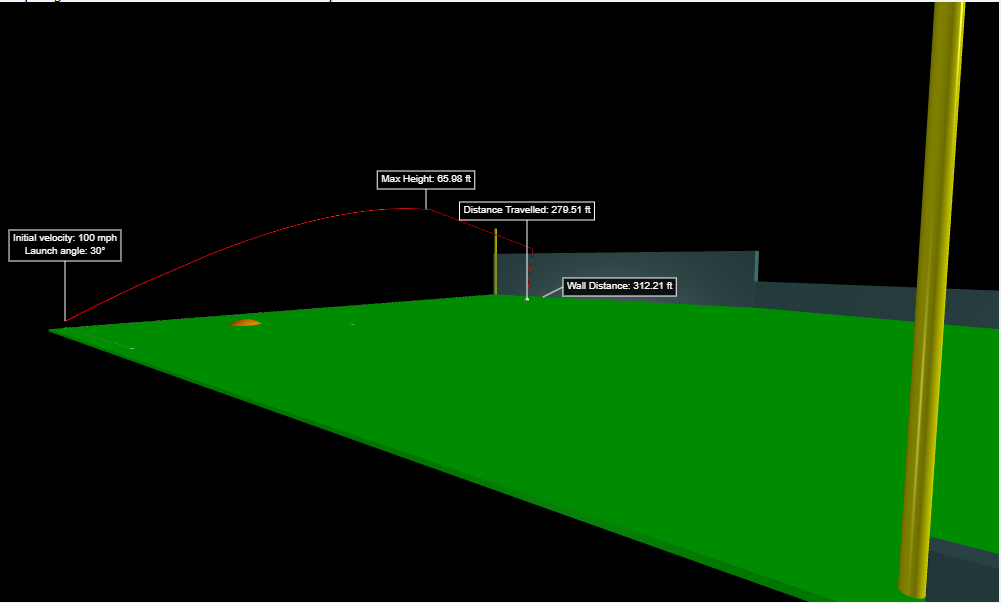

# Conclusions

The biggest challenge was implementing the class definitions into VPython. I had created most of this using Web VPython in Glowscript, because I was unable to run VPython in Jupyter Notebooks for some reason. Web VPython did not like my class definitions because they used numpy arrays, so it took a long time to realize this and make the necessary changes. Creating dimensionally accurate walls of Fenway Park was also a challenge, as there is not phenomenal information available about the exact size of Fenway. I used a LOT of trigonometry and a little estimation in right field to get a pretty good model of the park's dimensions. The Green Monster, the main focus of my simulation is dimensionally accurate, so there is use for this simulation in determining whether a fly ball to left field would be a home run at Fenway.

Another challenge I encountered was getting the correct values from my leapfrog implementation. I struggled with this for some time before realizing I had used inconsistent units in my density, $\rho$, and my mass. One was in slugs, and the other in lbs, so once I figured that out, I was able to get reasonable predictions for distance.

Overall, this was an extremely interesting project, and I was able to test several numerical methods (I tried RK4 and Euler early on before settling on Leapfrog) and explore a lot of interesting animation options within VPython.

Next steps for this project are adding spin to the ball in order to calculate more accurate predictions of distance using magnus force, and implementing a bat-to-ball collision to add more depth and use cases to the project.